In [1]:
rom keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.applications.vgg16 import VGG16
from skimage import io
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import numpy as np
import os


Using TensorFlow backend.


In [2]:

# считывание количества фотографий
def getData(NB_CLASSES):

    N = 0
    shape = 128
    rgb = 3
    path="dataset"
    for folder in os.listdir(path):
        for name in os.listdir(path + '/' + folder):
            N += 1

    X = np.zeros((N, shape, shape, rgb))
    Y = np.zeros((N))

    # считывание фоток для создания датасета
    step=0
    for i, folder in enumerate(os.listdir(path)):
        for j, name in enumerate(os.listdir(path + '/' + folder)):
            image = io.imread(path + '/' + folder + '/' + name)
            X[step] = image
            Y[step] = int(folder)
            step += 1

    Y = np_utils.to_categorical(Y, NB_CLASSES)
    X /= 255
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.2, random_state=42)

    return Xtrain, Xtest, Ytrain, Ytest


In [3]:

# adam 0.11

# model = VGG_16('vgg16_weights.h5')
def getModel(NB_CLASSES ):

    model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    model = Sequential()

    for layer in model_vgg.layers:
        model.add(layer)

    model.layers.pop()
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
  #  model.add(Dropout(0.2))
    model.add(Dense(NB_CLASSES, activation='softmax'))
    model.summary()
    return model


In [5]:
def train(model, Xtrain, Ytrain):
    model.compile(metrics=['categorical_accuracy'], optimizer='Adam', loss='categorical_crossentropy')

    history = model.fit(Xtrain, Ytrain, batch_size=8,
                        epochs=40, validation_split=0.2,
                        verbose=1)
    model.save_weights('face_net.h5', overwrite=True)
    return history


In [6]:
def test(model, Xtest, Ytest):
    print('Testing...')
    score = model.evaluate(Xtest, Ytest,
                           batch_size=10, verbose=True)
    print("\nTest score:", score[0])
    print('Test accuracy:', score[1])

    model_json = model.to_json()
    open('face_net.json', 'w').write(model_json)
    model.save_weights('face_net.h5', overwrite=True)
    return score



In [8]:
if __name__ == '__main__':
    NB_CLASSES = 28
    Xtrain, Xtest, Ytrain, Ytest = getData(NB_CLASSES)
    model = getModel(NB_CLASSES)
    history = train(model, Xtrain, Ytrain)
    score = test(model, Xtest, Ytest)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

Epoch 31/40
861/861 [==============================] - 50s 58ms/step - loss: 0.8220 - categorical_accuracy: 0.7816 - val_loss: 1.2530 - val_categorical_accuracy: 0.6944
Epoch 32/40
861/861 [==============================] - 50s 58ms/step - loss: 0.3332 - categorical_accuracy: 0.8943 - val_loss: 0.9519 - val_categorical_accuracy: 0.8009
Epoch 33/40
861/861 [==============================] - 50s 58ms/step - loss: 0.2801 - categorical_accuracy: 0.9106 - val_loss: 0.9716 - val_categorical_accuracy: 0.7685
Epoch 34/40
861/861 [==============================] - 50s 58ms/step - loss: 0.1917 - categorical_accuracy: 0.9292 - val_loss: 1.1496 - val_categorical_accuracy: 0.7963
Epoch 35/40
861/861 [==============================] - 50s 58ms/step - loss: 0.2081 - categorical_accuracy: 0.9361 - val_loss: 1.0585 - val_categorical_accuracy: 0.8056
Epoch 36/40
861/861 [==============================] - 50s 58ms/step - loss: 0.1788 - categorical_accuracy: 0.9350 - val_loss: 1.4737 - val_categorical_acc

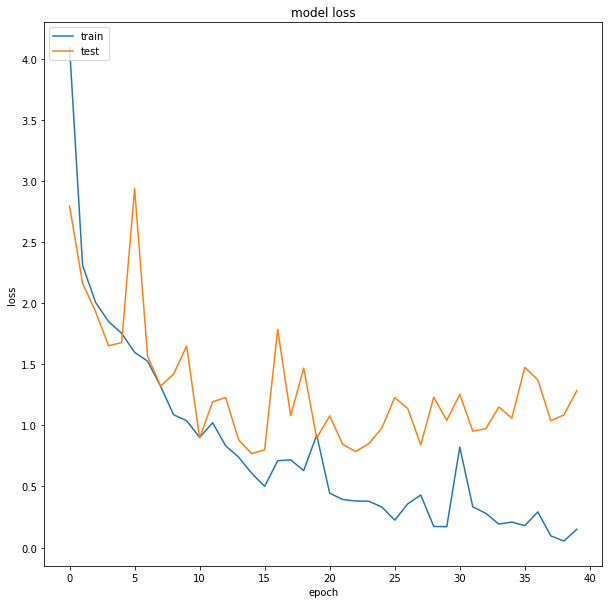

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

plt.show()  

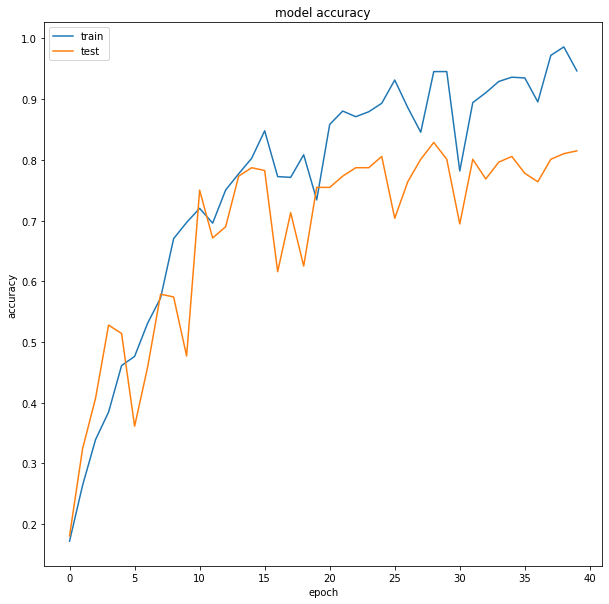

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['categorical_accuracy'])  
plt.plot(history.history['val_categorical_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  